# PRAKTIKUM 1
Klasifikasi 🐱 dan 🐶

**Deskripsi**

Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Machine_Learning/dataset.zip', 'r') as zipobj:
  zipobj.extractall('/content/drive/MyDrive/Machine_Learning')

#### Langkah 1 - Import Library

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

#### Langkah 2 - Pra Pengolahan Data

##### Langkah 2.1. Pra Pengolahan Data Training

In [4]:
# Membuat objek ImageDataGenerator untuk augmentasi dan normalisasi data pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalisasi nilai pixel antara 0 dan 1
    shear_range=0.2,          # Rentang pemotongan gambar
    zoom_range=0.2,           # Rentang perbesaran gambar
    horizontal_flip=True      # Melakukan flip horizontal pada gambar
)

# Membuat generator data pelatihan dari direktori yang berisi dataset pelatihan
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Machine_Learning/dataset/training_set',  # Path dataset pelatihan
    target_size=(64, 64),     # Ukuran gambar yang diharapkan
    batch_size=32,            # Ukuran setiap batch data pelatihan
    class_mode='binary'       # Jenis kelas (binary untuk klasifikasi biner)
)


Found 8017 images belonging to 2 classes.


##### Langkah 2.2. Pra Pengolahan Data Testing

In [5]:
# Membuat objek ImageDataGenerator untuk normalisasi data uji
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi nilai pixel antara 0 dan 1

# Membuat generator data uji dari direktori yang berisi dataset uji
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Machine_Learning/dataset/test_set',  # Path dataset uji
    target_size=(64, 64),     # Ukuran gambar yang diharapkan
    batch_size=32,            # Ukuran setiap batch data uji
    class_mode='binary'       # Jenis kelas (binary untuk klasifikasi biner)
)


Found 2000 images belonging to 2 classes.


#### Langkah 3 - Pembuatan Model CNN

##### Langkah 3.1.  - Inisiasi Model CNN

In [6]:
# Membuat model Sequential untuk Convolutional Neural Network (CNN)
cnn = tf.keras.models.Sequential()

##### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [7]:
# Menambahkan lapisan Convolutional 2D pada model CNN
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))


##### Langkah 3.3 - Pembuatan Layer Pooling 1

In [8]:
# Menambahkan lapisan MaxPooling 2D pada model CNN
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


##### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [9]:
# Menambahkan lapisan Convolutional 2D pada model CNN
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Menambahkan lapisan MaxPooling 2D pada model CNN
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

##### Langkah 3.5 - Flattening

In [10]:
# Menambahkan lapisan Flatten pada model CNN
cnn.add(tf.keras.layers.Flatten())

##### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [11]:
# Menambahkan lapisan Dense (fully connected) dengan 128 unit neuron dan fungsi aktivasi ReLU
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

##### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [12]:
# Menambahkan lapisan Dense (fully connected) dengan 1 unit neuron dan fungsi aktivasi sigmoid
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

##### Langkah 3.8 - Compile Model CNN

In [13]:
# Mengompilasi model CNN dengan pengoptimal 'adam', fungsi kerugian 'binary_crossentropy', dan metrik akurasi
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Langkah 4 - Fit CNN

In [14]:
# Melakukan pelatihan model CNN dengan data pelatihan (training_set) dan validasi (test_set) selama 25 epoch
cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
251/251 [==============================] - 53s 171ms/step - loss: 0.6741 - accuracy: 0.5833 - val_loss: 0.6140 - val_accuracy: 0.6755
Epoch 2/25
251/251 [==============================] - 39s 157ms/step - loss: 0.6093 - accuracy: 0.6749 - val_loss: 0.5734 - val_accuracy: 0.7100
Epoch 3/25
251/251 [==============================] - 38s 153ms/step - loss: 0.5702 - accuracy: 0.7069 - val_loss: 0.5543 - val_accuracy: 0.7160
Epoch 4/25
251/251 [==============================] - 38s 152ms/step - loss: 0.5343 - accuracy: 0.7321 - val_loss: 0.4990 - val_accuracy: 0.7555
Epoch 5/25
251/251 [==============================] - 43s 172ms/step - loss: 0.5122 - accuracy: 0.7448 - val_loss: 0.5083 - val_accuracy: 0.7455
Epoch 6/25
251/251 [==============================] - 38s 150ms/step - loss: 0.4859 - accuracy: 0.7687 - val_loss: 0.4967 - val_accuracy: 0.7630
Epoch 7/25
251/251 [==============================] - 37s 149ms/step - loss: 0.4742 - accuracy: 0.7731 - val_loss: 0.4899 - val_ac

#### Langkah 5 - Prediksi dengan 1 Citra
Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

In [15]:
# Import library yang diperlukan
import numpy as np
from keras.preprocessing import image

# Memuat dan memproses gambar uji
test_image = image.load_img('/content/drive/MyDrive/Machine_Learning/dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Memprediksi kelas gambar menggunakan model CNN yang telah dilatih
result = cnn.predict(test_image)

# Mendapatkan indeks kelas dari data pelatihan
class_indices = training_set.class_indices

# Menentukan hasil prediksi berdasarkan nilai probabilitas
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

1/1 [==============================] - 0s 147ms/step


# PRAKTIKUM 2

Klasifikasi Multi-label dengan Data CIFAT

**Deskripsi**

Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

#### Langkah 1 - Load Library

In [16]:
# Import library TensorFlow
import tensorflow as tf

# Import modul-modul dari TensorFlow
from tensorflow.keras import datasets, layers, models

# Import modul untuk plotting menggunakan matplotlib
import matplotlib.pyplot as plt


#### Langkah 2 - Unduh Dataset CIFAR

In [17]:
# Memuat data CIFAR-10 menggunakan datasets.cifar10.load_data()
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi nilai piksel ke rentang 0 hingga 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 4s 0us/step


#### Langkah 3 - Verifikasi Data

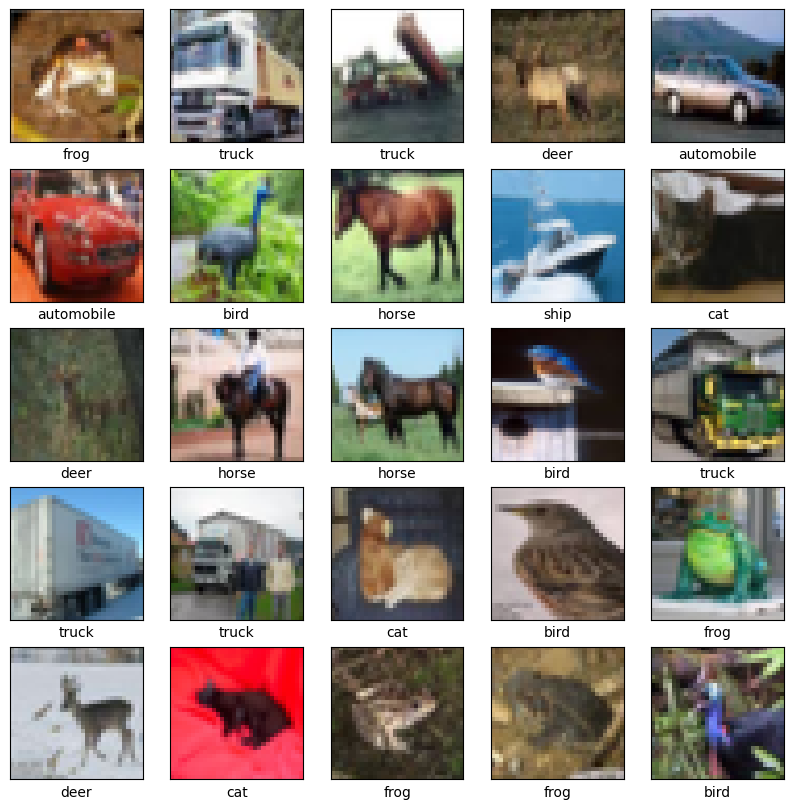

In [18]:
# Mendefinisikan nama kelas untuk label CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Menyiapkan plot untuk menampilkan 25 gambar dari data latih
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])  # Menampilkan gambar
    plt.xlabel(class_names[train_labels[i][0]])  # Menampilkan label kelas
plt.show()


#### Langkah 4 - Buat Model CNN

##### Langkah 4.1. - Buat Layer Konvolusi

In [19]:
# Membuat model sequential
model = models.Sequential()

# Menambahkan layer Convolutional dengan 32 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Menambahkan layer MaxPooling dengan ukuran pool (2,2)
model.add(layers.MaxPooling2D((2, 2)))

# Menambahkan layer Convolutional dengan 64 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Menambahkan layer MaxPooling dengan ukuran pool (2,2)
model.add(layers.MaxPooling2D((2, 2)))

# Menambahkan layer Convolutional dengan 64 filter, ukuran kernel (3,3), dan fungsi aktivasi ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


##### Langkah 4.2. - Cek Arsitektur Konvolusi

In [20]:
# Menampilkan ringkasan (summary) dari model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

##### Langkah 4.3. - Tambahkan Layer Fully Connected

In [21]:
# Menambahkan layer flatten untuk mengubah matriks menjadi vektor
model.add(layers.Flatten())

# Menambahkan layer Dense dengan 64 neuron dan fungsi aktivasi ReLU
model.add(layers.Dense(64, activation='relu'))

# Menambahkan layer Dense dengan 10 neuron (sesuai dengan jumlah kelas pada CIFAR-10)
model.add(layers.Dense(10))

##### Langkah 4.4. - Cek Arsitektur Model CNN

In [22]:
# Menampilkan ringkasan arsitektur model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

##### Langkah 4.5. - Compile Model CNN

In [23]:
# Mengompilasi model dengan konfigurasi optimizer, loss function, dan metrik evaluasi
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Langkah 5 - Fit Model

In [24]:
# Melakukan pelatihan model dengan data latih dan data uji untuk beberapa epoch
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.4999 - accuracy: 0.4531 - val_loss: 1.2270 - val_accuracy: 0.5590
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1268 - accuracy: 0.6008 - val_loss: 1.0661 - val_accuracy: 0.6193
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9728 - accuracy: 0.6580 - val_loss: 0.9848 - val_accuracy: 0.6500
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8746 - accuracy: 0.6935 - val_loss: 0.9433 - val_accuracy: 0.6767
Epoch 5/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8014 - accuracy: 0.7213 - val_loss: 0.8824 - val_accuracy: 0.6923
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7422 - accuracy: 0.7406 - val_loss: 0.8495 - val_accuracy: 0.7076
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6863 - accuracy: 0.7602 - val_loss: 0.9019 - val_accurac

#### Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.8651 - accuracy: 0.7174 - 944ms/epoch - 3ms/step


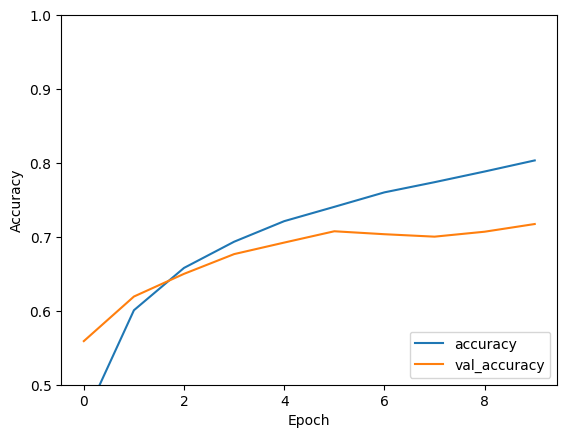

In [25]:
# Menampilkan grafik akurasi selama pelatihan dan validasi
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Mengevaluasi model pada data uji
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

#### Langkah 7 - Cetak Hasil Akurasi

In [26]:
print(test_acc)

0.7174000144004822


Berapa akurasi yang Anda dapatkan?

  Jawab :

  Akurasi yang didapatkan sekitar 0.7174000144004822